[0.7842087  0.2874215  0.48477342 ... 0.39187787 0.33358389 0.41055205]


/tmp/ipykernel_5611/291229105.py:18: RuntimeWarning: invalid value encountered in log
  return - np.sign(_x) * np.log(1 - 2 * np.abs(_x))
/tmp/ipykernel_5611/291229105.py:22: RuntimeWarning: invalid value encountered in log
  result = - np.sign(_x) * np.log(1 - 2 * np.abs(_x))


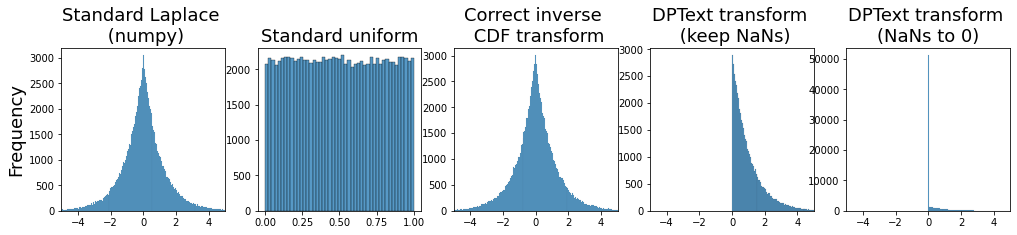

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from experiment import LaplaceMechanism, BeigiEtAlLaplaceMechanism

no_samples = 100_000

uniform_x = np.random.uniform(0, 1, no_samples)
print(uniform_x)


def transform_correct(_x: np.ndarray) -> np.ndarray:
    return - np.sign(_x - 0.5) * np.log(1 - 2 * np.abs(_x - 0.5))


def transform_dptext_nans(_x: np.ndarray) -> np.ndarray:
    return - np.sign(_x) * np.log(1 - 2 * np.abs(_x))


def transform_dptext(_x: np.ndarray) -> np.ndarray:
    result = - np.sign(_x) * np.log(1 - 2 * np.abs(_x))
    # get rid of NaN -> replace with 0
    np.nan_to_num(result, False, nan=0.0)
    return result


fig, axs = plt.subplots(ncols=5, figsize=(17, 3))

sns.histplot(np.random.laplace(size=no_samples), ax=axs[0])
sns.histplot(uniform_x, ax=axs[1])
sns.histplot(transform_correct(uniform_x), ax=axs[2])
sns.histplot(transform_dptext_nans(uniform_x), ax=axs[3])
sns.histplot(transform_dptext(uniform_x), ax=axs[4])
# both in one

for ax_no in (0, 2, 3, 4):
    axs[ax_no].set_xlim(-5, 5)

title_size = 18
axs[0].set_title("Standard Laplace \n (numpy)", size=title_size)
axs[1].set_title("Standard uniform", size=title_size)
axs[2].set_title("Correct inverse \n CDF transform", size=title_size)
axs[3].set_title("DPText transform \n (keep NaNs)", size=title_size)
axs[4].set_title("DPText transform \n(NaNs to 0)", size=title_size)

axs[0].set_ylabel("Frequency", size=18)

for ax_no in (1, 2, 3, 4):
    axs[ax_no].set_ylabel("")

#plt.show()
plt.savefig("out.pdf")

